# CTA策略研报复现1

## CTA策略的配置价值在于长期低相关性与抗通胀性

### 长期低相关性

商品市场长期与股票、债券市场具有低相关性

In [1]:
import akshare as ak

# 测试接口，返回所有指数实时数据
index_info = ak.stock_zh_index_spot()

In [2]:
index_info

,代码,名称,最新价,涨跌额,涨跌幅,昨收,今开,最高,最低,成交量,成交额
0,sh000001,上证指数,3176.1758,-2.251,-0.071,3178.4272,3180.5579,3186.2340,3147.3459,273251922,300827985375
1,sh000002,Ａ股指数,3329.6932,-2.313,-0.069,3332.0067,3334.2580,3340.2018,3299.4248,273072143,300678128291
2,sh000003,Ｂ股指数,268.1639,-1.632,-0.605,269.7963,269.4298,270.0353,266.8250,159121,83805942
3,sh000004,工业指数,2851.6993,-16.126,-0.562,2867.8249,2871.5438,2874.4228,2829.2822,125741276,176404606995
4,sh000005,商业指数,2626.6441,13.185,0.505,2613.4591,2610.4091,2629.1562,2596.3491,36675507,31414981149
...,...,...,...,...,...,...,...,...,...,...,...
543,sz980015,,8366.5280,-53.700,-0.638,8420.2280,8410.7330,8410.7330,8289.9500,306874926,11267288407
544,sz980016,,6935.4670,-27.151,-0.390,6962.6180,6962.2850,6962.9100,6871.8030,587476364,16713268015
545,sz980028,,10122.7710,-58.761,-0.577,10181.5320,10189.7970,10217.1710,10027.0270,149002793,4700917007
546,sz980030,,4430.0590,-72.970,-1.620,4503.0290,4512.8540,4518.2260,4381.3550,929390834,17595969047


In [3]:
# 获取万得全A（用上证代替）、中债新综合指数和中证商品期货指数（替换为南华商品指数）的相关信息
stock_index_df = ak.stock_zh_index_daily(symbol='sh000001')
commodity_index_df = ak.futures_return_index_nh(symbol='NHCI')
bond_index_df = ak.bond_new_composite_index_cbond()
print(stock_index_df)
print(commodity_index_df)
print(bond_index_df)

            date      open      high       low     close       volume
0     1990-12-19    96.050    99.980    95.790    99.980       126000
1     1990-12-20   104.300   104.390    99.980   104.390        19700
2     1990-12-21   109.070   109.130   103.730   109.130         2800
3     1990-12-24   113.570   114.550   109.130   114.550         3200
4     1990-12-25   120.090   120.250   114.550   120.250         1500
...          ...       ...       ...       ...       ...          ...
7973  2023-08-09  3251.152  3257.082  3240.289  3244.487  27121853800
7974  2023-08-10  3242.206  3257.030  3234.116  3254.560  28741214200
7975  2023-08-11  3254.475  3254.475  3189.248  3189.248  33013775000
7976  2023-08-14  3159.714  3180.507  3141.655  3178.427  29984032700
7977  2023-08-15  3180.558  3186.234  3147.346  3176.176  27325192200

[7978 rows x 6 columns]
            date       value
0     2004-06-01  1000.00000
1     2004-06-02  1010.57000
2     2004-06-03   992.78000
3     2004-06-04   

In [4]:
# 把数据整合到一个dataframe里面
import pandas as pd

stock_index_df.rename(columns={'close': 'stock'}, inplace=True)
commodity_index_df.rename(columns={'value': 'commodity'}, inplace=True)
bond_index_df.rename(columns={'value': 'bond'}, inplace=True)
merged_df = pd.merge(stock_index_df.loc[:, ['date', 'stock']], commodity_index_df)
merged_df = pd.merge(merged_df, bond_index_df)
merged_df

,date,stock,commodity,bond
0,2004-06-01,1579.658,1000.00000,104.5886
1,2004-06-02,1567.067,1010.57000,104.7350
2,2004-06-03,1543.527,992.78000,104.4258
3,2004-06-07,1517.145,996.31000,104.1311
4,2004-06-08,1493.814,992.67000,104.3620
...,...,...,...,...
3738,2023-08-07,3268.831,2424.85651,226.4849
3739,2023-08-08,3260.620,2408.14625,226.5200
3740,2023-08-09,3244.487,2426.33051,226.5217
3741,2023-08-10,3254.560,2422.46830,226.5787


低相关性1：计算相关性并且画图

In [5]:
# 计算收益率
pct_df = merged_df.loc[:, ['stock', 'commodity', 'bond']].pct_change()
pct_df = pd.concat([merged_df.loc[:, ['date']], pct_df], axis=1)
pct_df.dropna(inplace=True)
pct_df['date'] = pd.to_datetime(pct_df['date'])
pct_df.set_index('date', inplace=True)
pct_df

,stock,commodity,bond
date,,,
2004-06-02,-0.007971,0.010570,0.001400
2004-06-03,-0.015022,-0.017604,-0.002952
2004-06-07,-0.017092,0.003556,-0.002822
2004-06-08,-0.015378,-0.003653,0.002217
2004-06-09,-0.017233,-0.007908,-0.004253
...,...,...,...
2023-08-07,-0.003546,0.005852,0.000560
2023-08-08,-0.002512,-0.006891,0.000155
2023-08-09,-0.004948,0.007551,0.000008


In [6]:
# 计算250日相关系数
lookback_period = 250
correlation_df = pct_df.rolling(lookback_period).corr()
correlation_df.dropna(inplace=True)
correlation_df

stock  commodity      bond
date                                               
2005-09-05 stock      1.000000   0.132050  0.054052
           commodity  0.132050   1.000000  0.112058
           bond       0.054052   0.112058  1.000000
2005-09-06 stock      1.000000   0.134665  0.055381
           commodity  0.134665   1.000000  0.109532
...                        ...        ...       ...
2023-08-10 commodity  0.397681   1.000000 -0.092224
           bond      -0.114440  -0.092224  1.000000
2023-08-14 stock      1.000000   0.402307 -0.143005
           commodity  0.402307   1.000000 -0.092388
           bond      -0.143005  -0.092388  1.000000

[10479 rows x 3 columns]

In [7]:
commodity_correlation_df = correlation_df.iloc[range(1, len(correlation_df), 3)]
commodity_correlation_df.reset_index(inplace=True)
commodity_correlation_df.drop('level_1', axis=1, inplace=True)
commodity_correlation_df.drop('commodity', axis=1, inplace=True)
commodity_correlation_df.rename(columns={'stock': '与上证指数相关系数', 'bond': '与中债新指数相关系数'}, inplace=True)
commodity_correlation_df

C:\Users\sersmile\AppData\Local\Temp\ipykernel_18988\3142223450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_correlation_df.drop('level_1', axis=1, inplace=True)
C:\Users\sersmile\AppData\Local\Temp\ipykernel_18988\3142223450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commodity_correlation_df.drop('commodity', axis=1, inplace=True)
C:\Users\sersmile\AppData\Local\Temp\ipykernel_18988\3142223450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,date,与上证指数相关系数,与中债新指数相关系数
0,2005-09-05,0.132050,0.112058
1,2005-09-06,0.134665,0.109532
2,2005-09-07,0.125999,0.095184
3,2005-09-08,0.127947,0.097975
4,2005-09-12,0.127375,0.098733
...,...,...,...
3488,2023-08-07,0.441422,-0.103458
3489,2023-08-08,0.440604,-0.103193
3490,2023-08-09,0.446019,-0.103593
3491,2023-08-10,0.397681,-0.092224


(-1.0, 1.0)

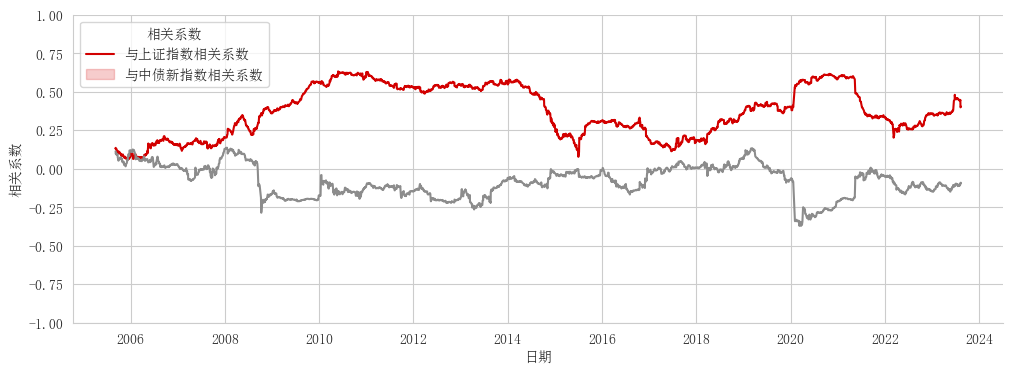

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'SimSun'
plt.rcParams['axes.unicode_minus'] = False

ax = sns.lineplot(data=commodity_correlation_df, x='date', y='与上证指数相关系数', color='#d20000')
sns.lineplot(data=commodity_correlation_df, x='date', y='与中债新指数相关系数', color='#8c8c8c')
ax.legend(['与上证指数相关系数', '与中债新指数相关系数'])
sns.move_legend(ax, 'upper left', title='相关系数')
sns.set_style('white')
sns.despine()
ax.figure.set_size_inches(12, 4)
ax.set_xlabel('日期')
ax.set_ylabel('相关系数')
ax.set_ylim(-1, 1)

低相关性2：投资组合中采用商品期货指数能提高夏普

In [9]:
"""
分别计算年化收益率，年华波动率与年化夏普比
年华收益率：
(1+r)^{n} = P_{t} / P_{0}
r = (P_{t} / P_{0})^{1 / n} - 1
"""
merged_df['date'] = pd.to_datetime(merged_df['date'])
price_2005 = merged_df[merged_df['date'].dt.year == 2005].iloc[0]
price_2022 = merged_df[merged_df['date'].dt.year == 2022].iloc[-1]

In [10]:
price_2005

date         2005-01-04 00:00:00
stock                   1242.774
commodity                 960.79
bond                    105.9273
Name: 119, dtype: object

In [11]:
price_2022

date         2022-12-30 00:00:00
stock                   3089.258
commodity             2380.65809
bond                    219.4264
Name: 3625, dtype: object

In [12]:
yearly_yield = (price_2022[['stock', 'commodity', 'bond']] / price_2005[['stock', 'commodity', 'bond']]) ** (1 / 18) - 1
yearly_yield

stock        0.051889
commodity    0.051702
bond         0.041289
dtype: object

In [13]:
"""
接下来计算年化波动率
年化波动率=std(收益率序列) * ( (天数/252) ** (1 / 2) )
"""
import numpy as np

yearly_volatility = pct_df.iloc[price_2005.name: price_2022.name].std() * np.sqrt(18)
yearly_volatility

stock        0.076963
commodity    0.047010
bond         0.003879
dtype: float64

In [14]:
"""
接下来计算sharpe比率
sharpe = (年化收益率 - 年化无风险利率) / 策略年化波动率
"""
sharpe = (yearly_yield - 0.03) / yearly_volatility
sharpe

stock        0.284414
commodity    0.461649
bond         2.910191
dtype: object

In [15]:
"""
验证投资组合的风险分散能力
60/40股债组合
10%商品+90%股债组合
"""
merged_df['stock-bond'] = 0.6 * merged_df['stock'] + 0.4 * merged_df['bond']
merged_df['commodity-stock-bond'] = 0.1 * merged_df['commodity'] + 0.9 * merged_df['stock-bond']
merged_df

,date,stock,commodity,bond,stock-bond,commodity-stock-bond
0,2004-06-01,1579.658,1000.00000,104.5886,989.63024,990.667216
1,2004-06-02,1567.067,1010.57000,104.7350,982.13420,984.977780
2,2004-06-03,1543.527,992.78000,104.4258,967.88652,970.375868
3,2004-06-07,1517.145,996.31000,104.1311,951.93944,956.376496
4,2004-06-08,1493.814,992.67000,104.3620,938.03320,943.496880
...,...,...,...,...,...,...
3738,2023-08-07,3268.831,2424.85651,226.4849,2051.89256,2089.188955
3739,2023-08-08,3260.620,2408.14625,226.5200,2046.98000,2083.096625
3740,2023-08-09,3244.487,2426.33051,226.5217,2037.30088,2076.203843
3741,2023-08-10,3254.560,2422.46830,226.5787,2043.36748,2081.277562


In [16]:
# 计算收益率
pct_df_new = merged_df.loc[:, ['stock', 'commodity', 'bond', 'stock-bond', 'commodity-stock-bond']].pct_change()
pct_df_new = pd.concat([merged_df.loc[:, ['date']], pct_df_new], axis=1)
pct_df_new.dropna(inplace=True)
pct_df_new['date'] = pd.to_datetime(pct_df_new['date'])
pct_df_new.set_index('date', inplace=True)
pct_df_new

,stock,commodity,bond,stock-bond,commodity-stock-bond
date,,,,,
2004-06-02,-0.007971,0.010570,0.001400,-0.007575,-0.005743
2004-06-03,-0.015022,-0.017604,-0.002952,-0.014507,-0.014825
2004-06-07,-0.017092,0.003556,-0.002822,-0.016476,-0.014427
2004-06-08,-0.015378,-0.003653,0.002217,-0.014608,-0.013467
2004-06-09,-0.017233,-0.007908,-0.004253,-0.016655,-0.015735
...,...,...,...,...,...
2023-08-07,-0.003546,0.005852,0.000560,-0.003365,-0.002304
2023-08-08,-0.002512,-0.006891,0.000155,-0.002394,-0.002916
2023-08-09,-0.004948,0.007551,0.000008,-0.004728,-0.003309


In [17]:
price_2005 = merged_df[merged_df['date'].dt.year == 2005].iloc[0]
price_2022 = merged_df[merged_df['date'].dt.year == 2022].iloc[-1]

In [18]:
price_2005

date                    2005-01-04 00:00:00
stock                              1242.774
commodity                            960.79
bond                               105.9273
stock-bond                        788.03532
commodity-stock-bond             805.310788
Name: 119, dtype: object

In [19]:
price_2022

date                    2022-12-30 00:00:00
stock                              3089.258
commodity                        2380.65809
bond                               219.4264
stock-bond                       1941.32536
commodity-stock-bond            1985.258633
Name: 3625, dtype: object

In [20]:
yearly_yield_new = (price_2022[['stock', 'commodity', 'bond', 'stock-bond', 'commodity-stock-bond']] / price_2005[['stock', 'commodity', 'bond', 'stock-bond', 'commodity-stock-bond']]) ** (1 / 18) - 1
yearly_yield_new

stock                   0.051889
commodity               0.051702
bond                    0.041289
stock-bond              0.051364
commodity-stock-bond    0.051404
dtype: object

In [21]:
import numpy as np

yearly_volatility_new = pct_df_new.iloc[price_2005.name: price_2022.name].std() * np.sqrt(18)
yearly_volatility_new

stock                   0.076963
commodity               0.047010
bond                    0.003879
stock-bond              0.074371
commodity-stock-bond    0.070201
dtype: float64

In [22]:
sharpe = (yearly_yield_new - 0.03) / yearly_volatility_new
sharpe

stock                   0.284414
commodity               0.461649
bond                    2.910191
stock-bond              0.287256
commodity-stock-bond    0.304897
dtype: object

最后的结果展示如下：

![投资组合结果展示](投资组合结果.png)

从上图可以看出，商品组合的加入增加了股债组合夏普比率，这是由于商品组合具有低相关性的特征

### 抗通胀性

In [23]:
"""
将资产收益率对时间滞后项做线性回归，看R2的大小
资产池：农产品、能化、贵金属、有色金属、黑色、上证50、沪深300、中证500、中证1000、国债、信用债、金融债
"""
# 先获取资产池内的所有数据，整合到一个dataframe里
NHAI_data = ak.futures_return_index_nh(symbol='NHAI')  # 南华农产品指数
NHECI_data = ak.futures_return_index_nh(symbol='NHECI')  # 南华能化指数
NHPMI_data = ak.futures_return_index_nh(symbol='NHPMI')  # 南华贵金属指数
# NH0070_data = ak.futures_return_index_nh(symbol='NH0070')  # 南华有色金属指数
# NH0800_data = ak.futures_return_index_nh(symbol='NH0080')  # 南华黑色指数
SZ50_data = ak.stock_zh_index_daily(symbol='sh000016')  # 上证50
HS300_data = ak.stock_zh_index_daily(symbol='sh000300')  # 沪深300
ZZ500_data = ak.stock_zh_index_daily(symbol='sz399905')  # 中证500
ZZ1000_data = ak.stock_zh_index_daily(symbol='sh000852')  # 中证1000
# Bond_10 = ak.futures_zh_daily_sina(symbol='T9999.CCFX')  # 十年期国债主力合约
# Bond_5 = ak.futures_zh_daily_sina(symbol='TF9999.CCFX')  # 五年期国债主力合约
# Bond_2 = ak.futures_zh_daily_sina(symbol='TS9999.CCFX')  # 两年期国债主力合约

In [24]:
NHAI_data.rename(columns={'value': '农产品'}, inplace=True)
NHECI_data.rename(columns={'value': '能化'}, inplace=True)
NHPMI_data.rename(columns={'value': '贵金属'}, inplace=True)
NH_data = pd.merge(NHAI_data, NHECI_data)
NH_data = pd.merge(NH_data, NHPMI_data)
NH_data

,date,农产品,能化,贵金属
0,2012-09-06,941.30000,1255.76000,1000.00000
1,2012-09-07,938.74000,1266.98000,983.26000
2,2012-09-10,945.00000,1303.32000,1020.41000
3,2012-09-11,939.84000,1311.14000,1017.93000
4,2012-09-12,942.85000,1321.74000,1017.70000
...,...,...,...,...
2654,2023-08-08,1151.18880,1849.30169,761.83930
2655,2023-08-09,1163.65296,1868.34477,759.77079
2656,2023-08-10,1157.65246,1875.19451,756.56113
2657,2023-08-11,1155.48160,1882.76247,761.27611


In [25]:
SZ_50_part = SZ50_data[['date', 'close']]
SZ_50_part.rename(columns={'close': '上证50'}, inplace=True)
HS300_part = HS300_data[['date', 'close']]
HS300_part.rename(columns={'close': '沪深300'}, inplace=True)
ZZ500_part = ZZ500_data[['date', 'close']]
ZZ500_part.rename(columns={'close': '中证500'}, inplace=True)
ZZ1000_part = ZZ1000_data[['date', 'close']]
ZZ1000_part.rename(columns={'close': '中证1000'}, inplace=True)
Stock_data = pd.merge(SZ_50_part, HS300_part)
Stock_data = pd.merge(Stock_data, ZZ500_part)
Stock_data = pd.merge(Stock_data, ZZ1000_part)
Stock_data

C:\Users\sersmile\AppData\Local\Temp\ipykernel_18988\1849258902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SZ_50_part.rename(columns={'close': '上证50'}, inplace=True)
C:\Users\sersmile\AppData\Local\Temp\ipykernel_18988\1849258902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HS300_part.rename(columns={'close': '沪深300'}, inplace=True)
C:\Users\sersmile\AppData\Local\Temp\ipykernel_18988\1849258902.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,date,上证50,沪深300,中证500,中证1000
0,2014-10-17,1608.516,2441.732,4860.732,6058.668
1,2014-10-20,1612.402,2454.711,4929.160,6154.520
2,2014-10-21,1600.844,2433.391,4884.024,6103.008
3,2014-10-22,1597.125,2418.641,4825.609,6027.510
4,2014-10-23,1586.557,2395.936,4755.231,5930.483
...,...,...,...,...,...
2146,2023-08-09,2628.704,3967.565,6021.750,6420.977
2147,2023-08-10,2629.443,3975.717,6031.710,6426.814
2148,2023-08-11,2568.898,3884.254,5913.350,6304.635
2149,2023-08-14,2549.284,3855.906,5916.803,6319.407


由于找不到PPI的月度数据，因此获取CPI月度数据进行回归，应该也有一定的相关性

In [26]:
CPI_monthly = ak.macro_china_cpi_monthly()
CPI_monthly.index = pd.to_datetime(CPI_monthly.index)
CPI_monthly

1996-02-01    2.1
1996-03-01    2.3
1996-04-01    0.6
1996-05-01    0.7
1996-06-01   -0.5
             ... 
2023-04-11   -0.3
2023-05-11   -0.1
2023-06-09   -0.2
2023-07-10   -0.2
2023-08-09    0.2
Name: cpi, Length: 323, dtype: float64

In [27]:
NH_data['date'] = pd.to_datetime(NH_data['date'])
NH_data.set_index('date', inplace=True)
NH_data_monthly = NH_data.resample('M', loffset=pd.offsets.MonthBegin(0)).first()
NH_data_monthly

C:\Users\sersmile\AppData\Local\Temp\ipykernel_18988\1254288156.py:3: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  NH_data_monthly = NH_data.resample('M', loffset=pd.offsets.MonthBegin(0)).first()


,农产品,能化,贵金属
date,,,
2012-10-01,941.30000,1255.76000,1000.00000
2012-11-01,897.48000,1333.65000,1016.85000
2012-12-01,904.30000,1358.90000,979.08000
2013-01-01,897.25000,1372.75000,970.12000
2013-02-01,903.87000,1502.97000,894.07000
...,...,...,...
2023-05-01,1070.64294,1891.56504,728.06302
2023-06-01,1051.40443,1699.80289,772.63247
2023-07-01,1036.08326,1639.65273,752.27846


In [28]:
Stock_data['date'] = pd.to_datetime(Stock_data['date'])
Stock_data.set_index('date', inplace=True)
Stock_data_monthly = Stock_data.resample('M', loffset=pd.offsets.MonthBegin(0)).first()
Stock_data_monthly

C:\Users\sersmile\AppData\Local\Temp\ipykernel_18988\2531406584.py:3: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  Stock_data_monthly = Stock_data.resample('M', loffset=pd.offsets.MonthBegin(0)).first()


,上证50,沪深300,中证500,中证1000
date,,,,
2014-11-01,1608.516,2441.732,4860.732,6058.668
2014-12-01,1651.052,2512.548,5028.698,6275.993
2015-01-01,1920.380,2819.812,5208.139,6392.464
2015-02-01,2649.639,3641.541,5417.017,6049.787
2015-03-01,2332.533,3353.960,5609.389,6535.903
...,...,...,...,...
2023-05-01,2665.723,4090.568,6413.807,6962.205
2023-06-01,2692.691,4030.247,6262.389,6733.969
2023-07-01,2500.340,3806.868,6051.460,6574.758


In [29]:
NH_data_monthly['date'] = NH_data_monthly.index
NH_data_monthly.reset_index(drop=True, inplace=True)
Stock_data_monthly['date'] = Stock_data_monthly.index
Stock_data_monthly.reset_index(drop=True, inplace=True)
CPI_monthly = pd.DataFrame(CPI_monthly)
CPI_monthly['date'] = CPI_monthly.index
CPI_monthly.reset_index(drop=True, inplace=True)
CPI_monthly['date'] = CPI_monthly['date'].dt.to_period('M').dt.to_timestamp()

NH_CPI = pd.merge(NH_data_monthly, CPI_monthly, on='date')
stock_CPI = pd.merge(Stock_data_monthly, CPI_monthly, on='date')

In [30]:
NH_CPI

,农产品,能化,贵金属,date,cpi
0,941.30000,1255.76000,1000.00000,2012-10-01,0.3
1,897.48000,1333.65000,1016.85000,2012-11-01,-0.1
2,904.30000,1358.90000,979.08000,2012-12-01,0.1
3,897.25000,1372.75000,970.12000,2013-01-01,0.8
4,903.87000,1502.97000,894.07000,2013-02-01,1.0
...,...,...,...,...,...
118,1129.97973,1954.63847,687.03464,2023-04-01,-0.3
119,1070.64294,1891.56504,728.06302,2023-05-01,-0.1
120,1051.40443,1699.80289,772.63247,2023-06-01,-0.2
121,1036.08326,1639.65273,752.27846,2023-07-01,-0.2


In [31]:
stock_CPI

,上证50,沪深300,中证500,中证1000,date,cpi
0,1608.516,2441.732,4860.732,6058.668,2014-11-01,0.0
1,1651.052,2512.548,5028.698,6275.993,2014-12-01,-0.2
2,1920.380,2819.812,5208.139,6392.464,2015-01-01,0.3
3,2649.639,3641.541,5417.017,6049.787,2015-02-01,0.3
4,2332.533,3353.960,5609.389,6535.903,2015-03-01,1.2
...,...,...,...,...,...,...
93,2773.649,4126.942,6402.141,7002.771,2023-04-01,-0.3
94,2665.723,4090.568,6413.807,6962.205,2023-05-01,-0.1
95,2692.691,4030.247,6262.389,6733.969,2023-06-01,-0.2
96,2500.340,3806.868,6051.460,6574.758,2023-07-01,-0.2


In [32]:
"""
进行线性回归，并且获取R2的大小
"""
# NH_CPI[['date', 'cpi']]
NH_CPI_pct = NH_CPI[['农产品', '能化', '贵金属']].pct_change().join(NH_CPI[['date', 'cpi']])
stock_CPI_pct = stock_CPI[['上证50', '沪深300', '中证500', '中证1000']].pct_change().join(stock_CPI[['date', 'cpi']])
NH_CPI_pct.dropna(inplace=True)
stock_CPI_pct.dropna(inplace=True)
NH_CPI_pct

,农产品,能化,贵金属,date,cpi
1,-0.046553,0.062026,0.016850,2012-11-01,-0.1
2,0.007599,0.018933,-0.037144,2012-12-01,0.1
3,-0.007796,0.010192,-0.009151,2013-01-01,0.8
4,0.007378,0.094861,-0.078392,2013-02-01,1.0
5,0.014571,0.017998,0.030602,2013-03-01,1.1
...,...,...,...,...,...
118,0.006993,0.005859,-0.033377,2023-04-01,-0.3
119,-0.052511,-0.032269,0.059718,2023-05-01,-0.1
120,-0.017969,-0.101378,0.061216,2023-06-01,-0.2
121,-0.014572,-0.035387,-0.026344,2023-07-01,-0.2


In [33]:
# 先假设时间滞后为0，测试一下代码
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
reg = LR.fit(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])
reg.score(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])

0.008905703967200806

In [34]:
inflation_result = {}
for delay in range(-8, 8):
    if delay > 0:
        # delay > 0是滞后
        reg_inflation0 = LR.fit(NH_CPI_pct[['cpi']].iloc[:-delay], NH_CPI_pct[['农产品']].iloc[delay:])
        R2_0 = reg_inflation0.score(NH_CPI_pct[['cpi']].iloc[:-delay], NH_CPI_pct[['农产品']].iloc[delay:])
        reg_inflation1 = LR.fit(NH_CPI_pct[['cpi']].iloc[:-delay], NH_CPI_pct[['能化']].iloc[delay:])
        R2_1 = reg_inflation1.score(NH_CPI_pct[['cpi']].iloc[:-delay], NH_CPI_pct[['能化']].iloc[delay:])
        reg_inflation2 = LR.fit(NH_CPI_pct[['cpi']].iloc[:-delay], NH_CPI_pct[['贵金属']].iloc[delay:])
        R2_2 = reg_inflation2.score(NH_CPI_pct[['cpi']].iloc[:-delay], NH_CPI_pct[['贵金属']].iloc[delay:])

        reg_inflation3 = LR.fit(stock_CPI_pct[['cpi']].iloc[:-delay], stock_CPI_pct[['上证50']].iloc[delay:])
        R2_3 = reg_inflation3.score(stock_CPI_pct[['cpi']].iloc[:-delay], stock_CPI_pct[['上证50']].iloc[delay:])
        reg_inflation4 = LR.fit(stock_CPI_pct[['cpi']].iloc[:-delay], stock_CPI_pct[['沪深300']].iloc[delay:])
        R2_4 = reg_inflation4.score(stock_CPI_pct[['cpi']].iloc[:-delay], stock_CPI_pct[['沪深300']].iloc[delay:])
        reg_inflation5 = LR.fit(stock_CPI_pct[['cpi']].iloc[:-delay], stock_CPI_pct[['中证500']].iloc[delay:])
        R2_5 = reg_inflation5.score(stock_CPI_pct[['cpi']].iloc[:-delay], stock_CPI_pct[['中证500']].iloc[delay:])
        reg_inflation6 = LR.fit(stock_CPI_pct[['cpi']].iloc[:-delay], stock_CPI_pct[['中证1000']].iloc[delay:])
        R2_6 = reg_inflation6.score(stock_CPI_pct[['cpi']].iloc[:-delay], stock_CPI_pct[['中证1000']].iloc[delay:])
    elif delay < 0:
        reg_inflation0 = LR.fit(NH_CPI_pct[['cpi']].iloc[-delay:], NH_CPI_pct[['农产品']].iloc[:delay])
        R2_0 = reg_inflation0.score(NH_CPI_pct[['cpi']].iloc[-delay:], NH_CPI_pct[['农产品']].iloc[:delay])
        reg_inflation1 = LR.fit(NH_CPI_pct[['cpi']].iloc[-delay:], NH_CPI_pct[['能化']].iloc[:delay])
        R2_1 = reg_inflation1.score(NH_CPI_pct[['cpi']].iloc[-delay:], NH_CPI_pct[['能化']].iloc[:delay])
        reg_inflation2 = LR.fit(NH_CPI_pct[['cpi']].iloc[-delay:], NH_CPI_pct[['贵金属']].iloc[:delay])
        R2_2 = reg_inflation2.score(NH_CPI_pct[['cpi']].iloc[-delay:], NH_CPI_pct[['贵金属']].iloc[:delay])

        reg_inflation3 = LR.fit(stock_CPI_pct[['cpi']].iloc[-delay:], stock_CPI_pct[['上证50']].iloc[:delay])
        R2_3 = reg_inflation3.score(stock_CPI_pct[['cpi']].iloc[-delay:], stock_CPI_pct[['上证50']].iloc[:delay])
        reg_inflation4 = LR.fit(stock_CPI_pct[['cpi']].iloc[-delay:], stock_CPI_pct[['沪深300']].iloc[:delay])
        R2_4 = reg_inflation4.score(stock_CPI_pct[['cpi']].iloc[-delay:], stock_CPI_pct[['沪深300']].iloc[:delay])
        reg_inflation5 = LR.fit(stock_CPI_pct[['cpi']].iloc[-delay:], stock_CPI_pct[['中证500']].iloc[:delay])
        R2_5 = reg_inflation5.score(stock_CPI_pct[['cpi']].iloc[-delay:], stock_CPI_pct[['中证500']].iloc[:delay])
        reg_inflation6 = LR.fit(stock_CPI_pct[['cpi']].iloc[-delay:], stock_CPI_pct[['中证1000']].iloc[:delay])
        R2_6 = reg_inflation6.score(stock_CPI_pct[['cpi']].iloc[-delay:], stock_CPI_pct[['中证1000']].iloc[:delay])
    else:
        reg_inflation0 = LR.fit(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])
        R2_0 = reg_inflation0.score(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])
        reg_inflation1 = LR.fit(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])
        R2_1 = reg_inflation1.score(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])
        reg_inflation2 = LR.fit(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])
        R2_2 = reg_inflation2.score(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])

        reg_inflation3 = LR.fit(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])
        R2_3 = reg_inflation3.score(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])
        reg_inflation4 = LR.fit(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])
        R2_4 = reg_inflation4.score(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])
        reg_inflation5 = LR.fit(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])
        R2_5 = reg_inflation5.score(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])
        reg_inflation6 = LR.fit(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])
        R2_6 = reg_inflation6.score(NH_CPI_pct[['cpi']], NH_CPI_pct[['农产品']])

    inflation_result[delay] = [R2_0, R2_1, R2_2, R2_3, R2_4, R2_5, R2_6]

In [35]:
inflation_result_df = pd.DataFrame(inflation_result, index=['农产品', '能化', '贵金属', '上证50', '沪深300', '中证500', '中证1000'])
inflation_result_df.to_excel('通胀回归结果.xlsx')

经过回归，我们得到如下结果：

![通胀回归结果](通胀回归结果.png)

表中所有值都是回归得到的R2

接下来为了更加直观地展示结果，绘制热力图

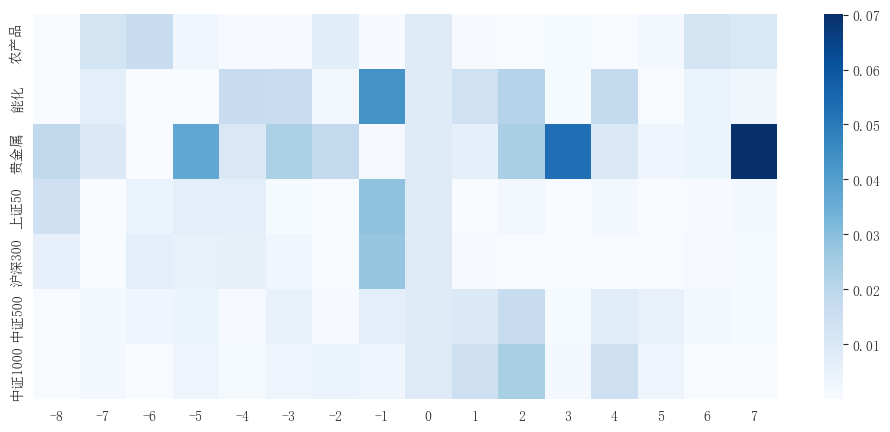

In [36]:
plt.rcParams['font.family'] = 'SimSun'
ax_heatmap = sns.heatmap(inflation_result_df, cmap='Blues')
ax_heatmap.figure.set_size_inches(12, 5)

趋势策略是CTA策略最主要的组成部分，趋势策略的本质在于趋势的可持续性和度量趋势的方法

# 趋势可持续性的度量

趋势可持续性的度量应该由下面的公式所决定：

![](趋势度量回归公式.png)

以周为时间单位，sigma代表已实现波动率的指数加权，为了使得品种间的收益率具有可比性，对不同品种的周度收益做波动率矫正，记录回归后 Beta 系数的T值显著性。这么做的目的在于，趋势跟踪策略为时序动量，过去表现好（差）的资产在未来会继续上涨（下跌），因此若回归后 Beta 系数的T值越大，收益率的正负号“粘性”越大，代表收益率的持续性越好

In [37]:
NH_data.resample('W').first()

,农产品,能化,贵金属
date,,,
2012-09-09,941.30000,1255.76000,1000.00000
2012-09-16,945.00000,1303.32000,1020.41000
2012-09-23,937.78000,1358.14000,1039.17000
2012-09-30,913.27000,1325.57000,1019.47000
2012-10-07,NaN,NaN,NaN
...,...,...,...
2023-07-23,1125.17802,1771.20237,772.58936
2023-07-30,1135.74123,1810.00820,778.11762
2023-08-06,1151.73973,1869.48090,769.49829


In [38]:
NH_std = NH_data.rolling(5).std()
NH_std.dropna(inplace=True)
NH_std.resample('W').first()

,农产品,能化,贵金属
date,,,
2012-09-16,2.473617,28.801315,15.989626
2012-09-23,3.724617,23.920477,15.681584
2012-09-30,9.482230,16.658281,10.682232
2012-10-07,NaN,NaN,NaN
2012-10-14,5.973127,10.218739,10.448717
...,...,...,...
2023-07-23,1.805560,18.217080,7.726407
2023-07-30,5.999361,10.492470,4.601562
2023-08-06,9.695944,28.164505,4.534513
